In [1]:
import pandas as pd
import os

# Load the provided CSV file to inspect its contents
path = os.path.join('..','results','merged_data.csv')
data = pd.read_csv(path)

# Get an initial idea of the structure of the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Time stamp  1007123 non-null  object
 1   Value       1007123 non-null  object
 2   Variable    1007123 non-null  object
dtypes: object(3)
memory usage: 23.1+ MB


,Time stamp,Value,Variable
0,07/07/2023 10:41:03,"491,00",TR2_Pot_att
1,07/07/2023 10:26:03,"498,00",TR2_Pot_att
2,07/07/2023 10:11:03,"498,00",TR2_Pot_att
3,07/07/2023 09:56:03,"538,00",TR2_Pot_att
4,07/07/2023 09:41:03,"505,00",TR2_Pot_att


Preprocessing the data

In [2]:
# Parsing 'Time stamp' into a datetime object
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format='%d/%m/%Y %H:%M:%S')

# Converting 'Value' column to numerical format, replacing dots with nothing, commas with dots
data['Value'] = data['Value'].str.replace('.','',regex=False).str.replace(',', '.').astype(float)

# Display the updated dataframe to confirm changes
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007123 entries, 0 to 1007122
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Time stamp  1007123 non-null  datetime64[ns]
 1   Value       1007123 non-null  float64       
 2   Variable    1007123 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 23.1+ MB


,Time stamp,Value,Variable
0,2023-07-07 10:41:03,491.0,TR2_Pot_att
1,2023-07-07 10:26:03,498.0,TR2_Pot_att
2,2023-07-07 10:11:03,498.0,TR2_Pot_att
3,2023-07-07 09:56:03,538.0,TR2_Pot_att
4,2023-07-07 09:41:03,505.0,TR2_Pot_att


In [3]:
# Group by Variable and Time stamp (day) and calculate the mean of Value
data_day_mean = data

data_day_mean['Day'] = data_day_mean['Time stamp'].dt.date
data_day_mean = data_day_mean.groupby(['Day', 'Variable']).mean().reset_index()

data_day_mean.head()

/tmp/ipykernel_37662/2502517917.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_day_mean = data_day_mean.groupby(['Day', 'Variable']).mean().reset_index()


,Day,Variable,Value
0,2022-01-06,TR1_Corr_1,626.222222
1,2022-01-06,TR1_Corr_2,650.818182
2,2022-01-06,TR1_Corr_3,602.454545
3,2022-01-06,TR1_Corr_N,28.250000
4,2022-01-06,TR1_Pot_att,437.230769


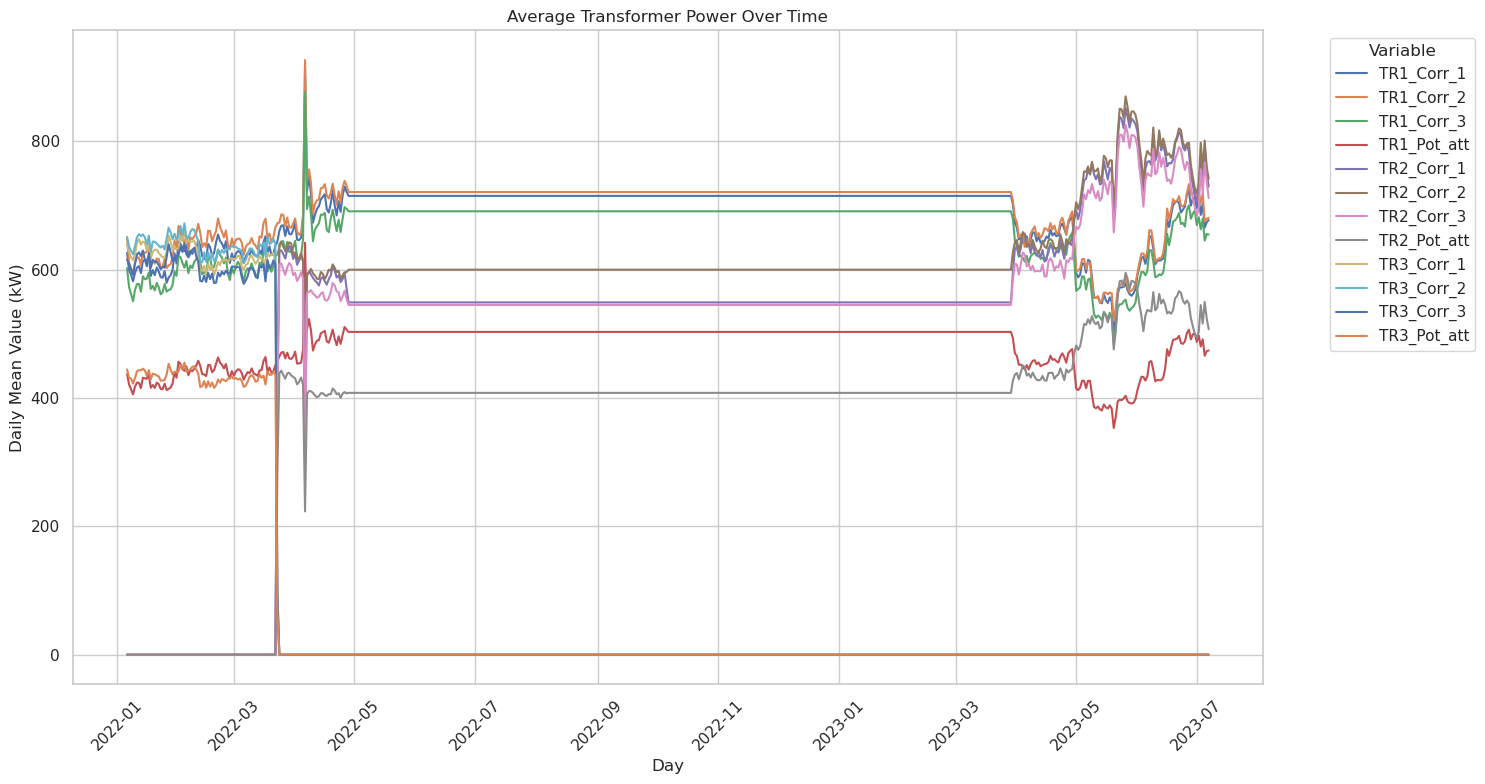

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

variables = data_day_mean['Variable'].unique()

tr123_variables = [var for var in variables if var.startswith('TR') and not var.endswith(('cosFi','N'))]
for variable in tr123_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Average Transformer Power Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

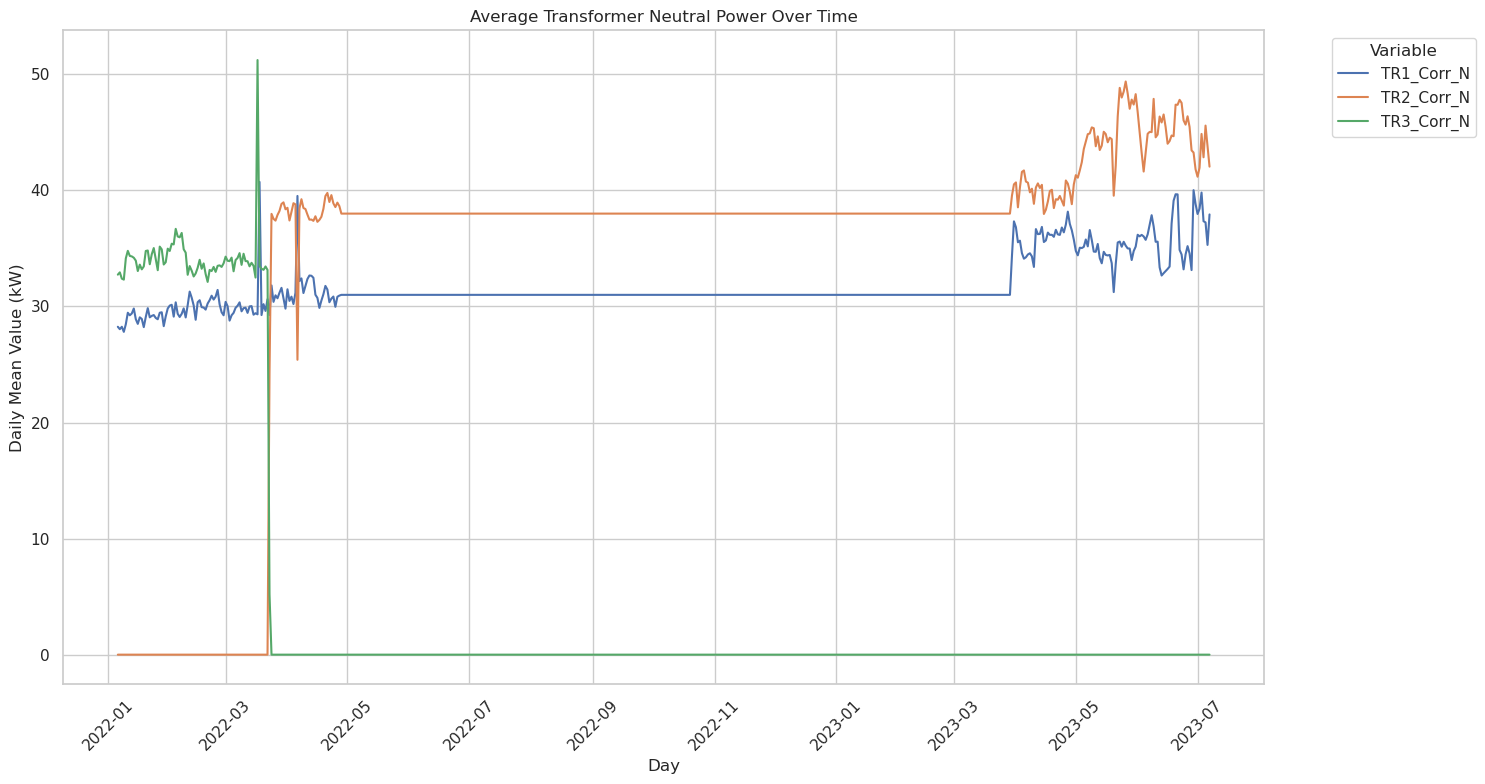

In [22]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

trN_variables = [var for var in variables if var.startswith('TR') and var.endswith('N')]
for variable in trN_variables:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Average Transformer Neutral Power Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

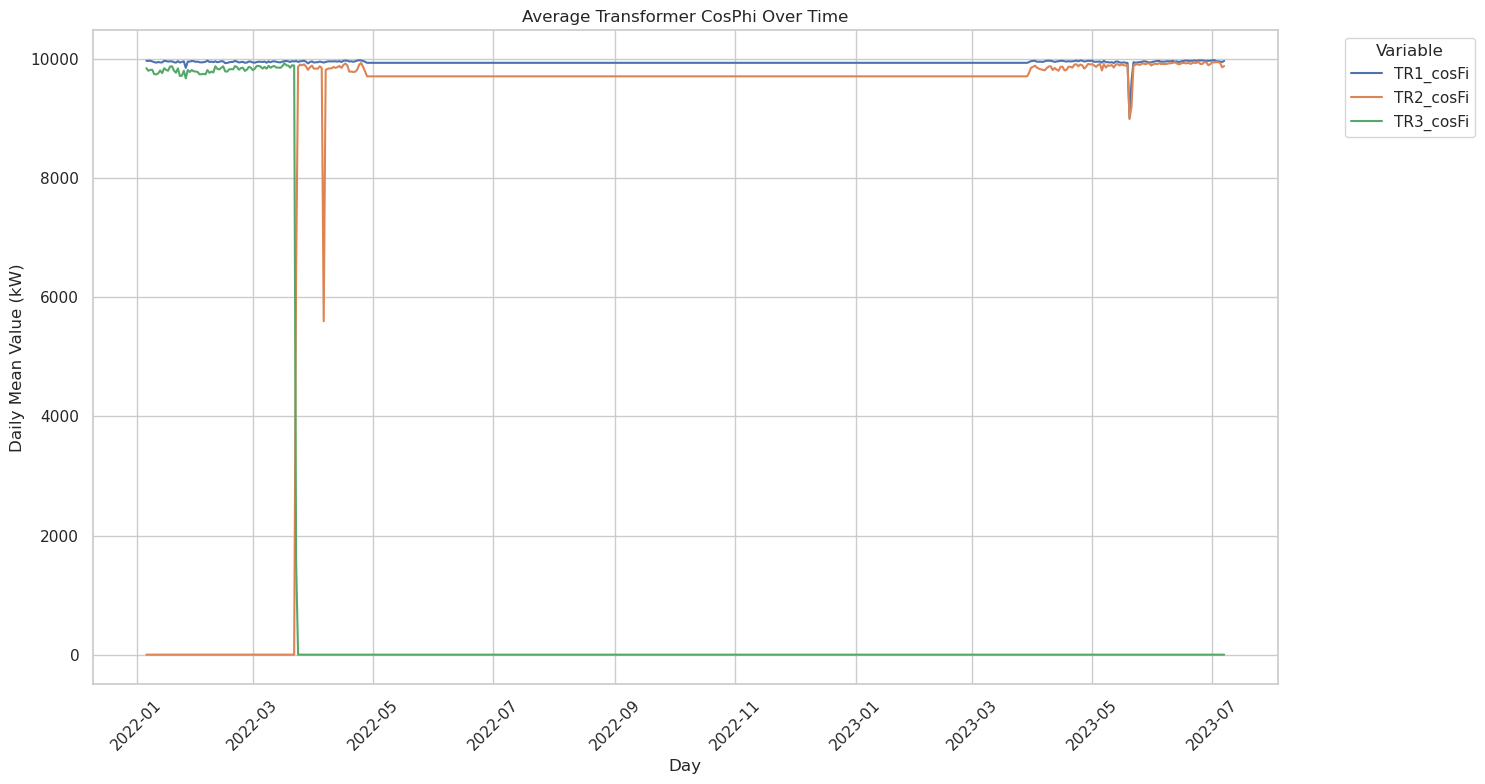

In [23]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

cosfi = [var for var in variables if var.endswith('cosFi')]
for variable in cosfi:
    subset = data_day_mean[data_day_mean['Variable'] == variable]
    plt.plot(subset['Day'], subset['Value'], label=variable)

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Average Transformer CosPhi Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

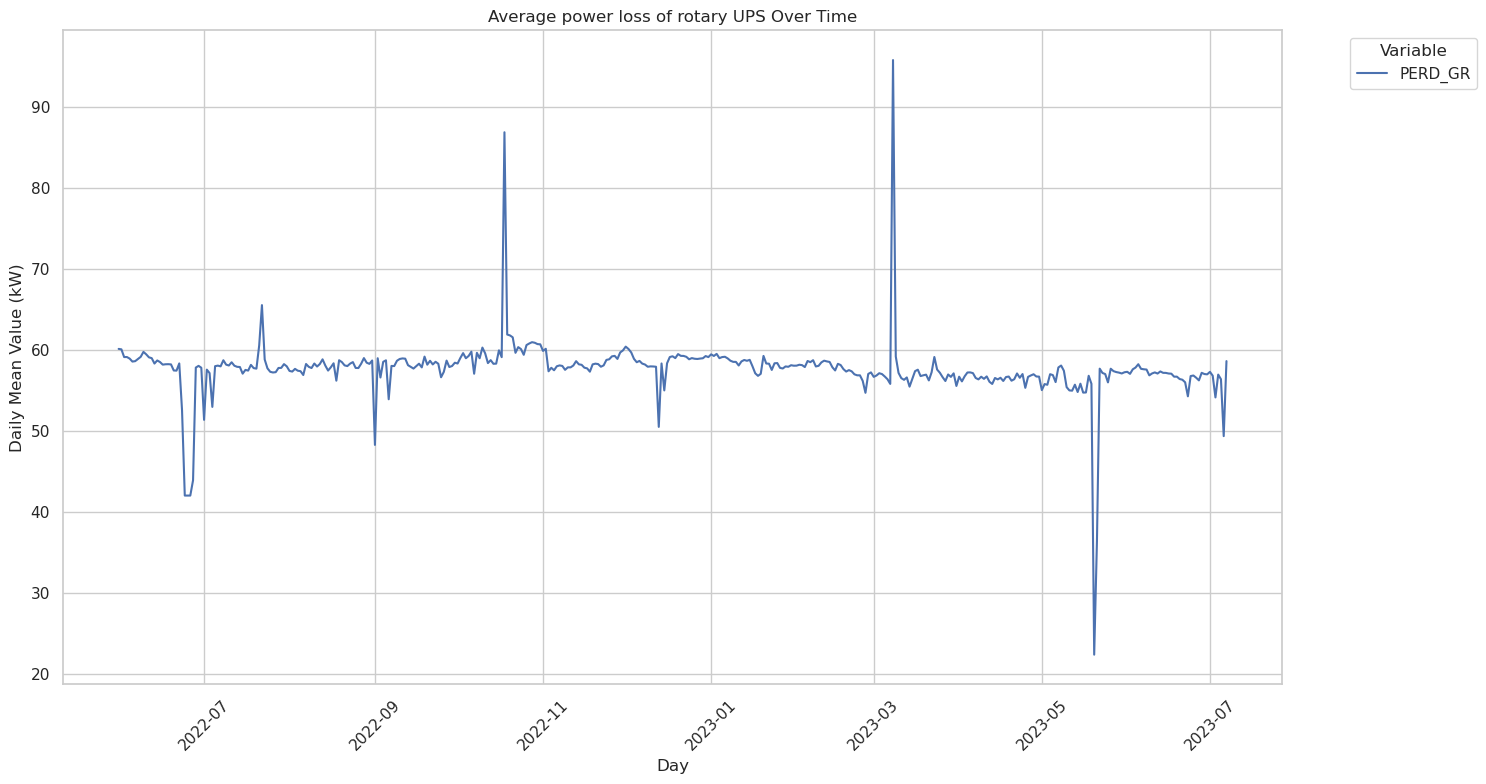

In [24]:
# Plotting the mean value for each variable per day
plt.figure(figsize=(15, 8))

perd_gr = data_day_mean[data_day_mean['Variable'] == 'PERD_GR']
plt.plot(perd_gr['Day'], perd_gr['Value'], label='PERD_GR')

plt.xlabel('Day')
plt.ylabel('Daily Mean Value (kW)')
plt.title('Average power loss of rotary UPS Over Time')
plt.xticks(rotation=45)
plt.legend(title='Variable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [ ]:
# Calculating the median value for each variable
median_values = data.groupby('Variable')['Value'].median()

# Merging the median values with the original data for comparison
data_with_median = data.merge(median_values, on='Variable', suffixes=('', '_median'))

# Calculating the deviation from the median for each data point
data_with_median['Deviation_from_Median'] = data_with_median['Value'] - data_with_median['Value_median']

# Displaying the updated dataframe with median values and deviations
data_with_median.head()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
features = data_with_median[['Value', 'Deviation_from_Median']]

# Applying K-Means clustering
# Starting with an arbitrary number of clusters, say 3
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)

# Adding the cluster labels to the dataframe
data_with_median['KMeans_Cluster'] = kmeans.labels_

# Plotting the results of K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_with_median['Value'], data_with_median['Deviation_from_Median'], c=data_with_median['KMeans_Cluster'])
plt.title('K-Means Clustering of Data Center Electrical Plant Data')
plt.xlabel('Value')
plt.ylabel('Deviation from Median')
plt.colorbar(label='Cluster Label')
plt.show()